In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
second = pd.read_excel('./data/delete_duplicated.xlsx')

## 견과류
- 439 - 508

In [ ]:
tmp = second['식품군'] == ('견과류')

- 채소군에 해당하는 식품군을 가져온다.

In [6]:
tmp_01 = second[439:(508 + 1)]

In [7]:
tmp_01.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
439,803,견과류,"개암, 마른것",100,659.0,13.0,20.0,59.0,NaN,NaN,NaN,NaN,0,2017
440,805,견과류,"개암, 볶은것",100,684.0,14.0,14.0,69.0,4.0,35.0,0.0,6.0,0,2017
441,807,견과류,"도토리 가공(가루), 도토리가루",100,304.0,84.0,1.0,1.0,NaN,2.0,NaN,NaN,0,2017
442,809,견과류,"도토리 가공(면류), 도토리묵",100,38.0,10.2,0.2,0.2,NaN,55.0,NaN,NaN,0,2017
443,811,견과류,"도토리, 생것",100,205.0,47.0,4.0,3.0,NaN,NaN,NaN,NaN,0,2017


In [8]:
tmp_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 439 to 508
Data columns (total 14 columns):
번호            70 non-null int64
식품군           70 non-null object
식품이름          70 non-null object
1회제공량 (g)     70 non-null int64
열량 (kcal)     70 non-null float64
탄수화물 (g)      70 non-null float64
단백질 (g)       70 non-null float64
지방 (g)        70 non-null float64
당류 (g)        44 non-null float64
나트륨 (mg)      62 non-null float64
콜레스테롤 (mg)    47 non-null float64
포화지방산 (g)     47 non-null float64
트랜스지방산 (g)    70 non-null int64
년도            70 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 8.2+ KB


In [9]:
tmp_01.shape

(70, 14)

## 유지류
1. 2232
2. 2257

In [10]:
tmp_02 = second[2232:(2257 + 1)]

In [11]:
tmp_02.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
2232,4211,유지류,닭기름,100,900.0,0.0,0.0,99.80,0.00,0.0,85.0,29.80,0,2017
2233,4213,유지류,돼지기름,100,941.0,0.0,0.0,100.00,NaN,0.0,100.0,39.29,0,2017
2234,4215,유지류,들기름,100,920.0,0.0,0.0,99.86,0.00,12.0,0.0,7.63,0,2017
2235,4217,유지류,땅콩기름,100,884.0,0.0,0.0,100.00,0.00,0.0,0.0,16.90,0,2017
2236,4219,유지류,땅콩버터,100,655.0,18.9,25.8,51.91,9.41,370.0,0.0,10.98,0,2017


In [12]:
tmp_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2232 to 2257
Data columns (total 14 columns):
번호            26 non-null int64
식품군           26 non-null object
식품이름          26 non-null object
1회제공량 (g)     26 non-null int64
열량 (kcal)     26 non-null float64
탄수화물 (g)      26 non-null float64
단백질 (g)       26 non-null float64
지방 (g)        26 non-null float64
당류 (g)        13 non-null float64
나트륨 (mg)      25 non-null float64
콜레스테롤 (mg)    21 non-null float64
포화지방산 (g)     21 non-null float64
트랜스지방산 (g)    26 non-null int64
년도            26 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 3.0+ KB


In [14]:
tmp_02.shape

(26, 14)

# 설정 파리미터

In [15]:
want_kcal = 45

# 지방 
rate = 5 
plus_rate = rate + rate * 0.1
print("양의 오차 = ", plus_rate)
minus_rate = rate - (rate * 0.1)
print("음의 오차 = ", minus_rate)

양의 오차 =  5.5
음의 오차 =  4.5


## 두 분류 합치기

In [16]:
total = pd.concat([tmp_01, tmp_02])

In [17]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 439 to 2257
Data columns (total 14 columns):
번호            96 non-null int64
식품군           96 non-null object
식품이름          96 non-null object
1회제공량 (g)     96 non-null int64
열량 (kcal)     96 non-null float64
탄수화물 (g)      96 non-null float64
단백질 (g)       96 non-null float64
지방 (g)        96 non-null float64
당류 (g)        57 non-null float64
나트륨 (mg)      87 non-null float64
콜레스테롤 (mg)    68 non-null float64
포화지방산 (g)     68 non-null float64
트랜스지방산 (g)    96 non-null int64
년도            96 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 11.2+ KB


In [18]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
439,803,견과류,"개암, 마른것",100,659.0,13.0,20.0,59.0,NaN,NaN,NaN,NaN,0,2017
440,805,견과류,"개암, 볶은것",100,684.0,14.0,14.0,69.0,4.0,35.0,0.0,6.0,0,2017
441,807,견과류,"도토리 가공(가루), 도토리가루",100,304.0,84.0,1.0,1.0,NaN,2.0,NaN,NaN,0,2017
442,809,견과류,"도토리 가공(면류), 도토리묵",100,38.0,10.2,0.2,0.2,NaN,55.0,NaN,NaN,0,2017
443,811,견과류,"도토리, 생것",100,205.0,47.0,4.0,3.0,NaN,NaN,NaN,NaN,0,2017


## index reset

In [19]:
total = total.reset_index()
del total['index']
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,803,견과류,"개암, 마른것",100,659.0,13.0,20.0,59.0,NaN,NaN,NaN,NaN,0,2017
1,805,견과류,"개암, 볶은것",100,684.0,14.0,14.0,69.0,4.0,35.0,0.0,6.0,0,2017
2,807,견과류,"도토리 가공(가루), 도토리가루",100,304.0,84.0,1.0,1.0,NaN,2.0,NaN,NaN,0,2017
3,809,견과류,"도토리 가공(면류), 도토리묵",100,38.0,10.2,0.2,0.2,NaN,55.0,NaN,NaN,0,2017
4,811,견과류,"도토리, 생것",100,205.0,47.0,4.0,3.0,NaN,NaN,NaN,NaN,0,2017


### Nan 값을 0.0 으로 채워 넣는다

In [20]:
total = total.fillna(0.0)

### 각 열의 값을 가져온다 

In [21]:
kcal = total['열량 (kcal)']
amount = total['1회제공량 (g)']
carbo = total['탄수화물 (g)']
protain = total['단백질 (g)']
fatt = total['지방 (g)']

### 설정한 칼로리에 따라 비례식을 계산한다.

In [22]:
new_amount = (want_kcal * amount) / kcal 
new_carbo  = (want_kcal * carbo) / kcal 
new_protain  = (want_kcal * protain) / kcal 
new_fatt  = (want_kcal * fatt) / kcal 

### 도출된 각 영양 성분을 가지고 칼로리를 계산한다.

In [23]:
estimate_kcal = (new_carbo * 4) + (new_protain * 4) + (new_fatt * 9)

### 각 열에 데이터를 업데이트 한다.

In [24]:
total['열량 (kcal)'] = want_kcal
total['1회제공량 (g)'] = new_amount
total['탄수화물 (g)'] = new_carbo
total['단백질 (g)'] = new_protain
total['지방 (g)'] = new_fatt

In [25]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,803,견과류,"개암, 마른것",6.828528,45,0.887709,1.365706,4.028832,0.0,0.0,0.0,0.0,0,2017
1,805,견과류,"개암, 볶은것",6.578947,45,0.921053,0.921053,4.539474,4.0,35.0,0.0,6.0,0,2017
2,807,견과류,"도토리 가공(가루), 도토리가루",14.802632,45,12.434211,0.148026,0.148026,0.0,2.0,0.0,0.0,0,2017
3,809,견과류,"도토리 가공(면류), 도토리묵",118.421053,45,12.078947,0.236842,0.236842,0.0,55.0,0.0,0.0,0,2017
4,811,견과류,"도토리, 생것",21.951220,45,10.317073,0.878049,0.658537,0.0,0.0,0.0,0.0,0,2017


## 칼로리 오차를 구한다

In [27]:
error = ( estimate_kcal - want_kcal ) 
total['Error'] = error
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도,Error
0,803,견과류,"개암, 마른것",6.828528,45,0.887709,1.365706,4.028832,0.0,0.0,0.0,0.0,0,2017,0.273141
1,805,견과류,"개암, 볶은것",6.578947,45,0.921053,0.921053,4.539474,4.0,35.0,0.0,6.0,0,2017,3.223684
2,807,견과류,"도토리 가공(가루), 도토리가루",14.802632,45,12.434211,0.148026,0.148026,0.0,2.0,0.0,0.0,0,2017,6.661184
3,809,견과류,"도토리 가공(면류), 도토리묵",118.421053,45,12.078947,0.236842,0.236842,0.0,55.0,0.0,0.0,0,2017,6.394737
4,811,견과류,"도토리, 생것",21.951220,45,10.317073,0.878049,0.658537,0.0,0.0,0.0,0.0,0,2017,5.707317


In [29]:
del total['당류 (g)']
del total['나트륨 (mg)']
del total['콜레스테롤 (mg)']
del total['포화지방산 (g)']
del total['트랜스지방산 (g)']
del total['년도']

In [30]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error
0,803,견과류,"개암, 마른것",6.828528,45,0.887709,1.365706,4.028832,0.273141
1,805,견과류,"개암, 볶은것",6.578947,45,0.921053,0.921053,4.539474,3.223684
2,807,견과류,"도토리 가공(가루), 도토리가루",14.802632,45,12.434211,0.148026,0.148026,6.661184
3,809,견과류,"도토리 가공(면류), 도토리묵",118.421053,45,12.078947,0.236842,0.236842,6.394737
4,811,견과류,"도토리, 생것",21.951220,45,10.317073,0.878049,0.658537,5.707317


### 영양 성분의 비를 연산한다.

In [31]:
new_rate =  new_fatt

In [33]:
tmp_rate = new_rate.between(minus_rate, plus_rate)
total['survived'] = tmp_rate

In [35]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived
0,803,견과류,"개암, 마른것",6.828528,45,0.887709,1.365706,4.028832,0.273141,False
1,805,견과류,"개암, 볶은것",6.578947,45,0.921053,0.921053,4.539474,3.223684,True
2,807,견과류,"도토리 가공(가루), 도토리가루",14.802632,45,12.434211,0.148026,0.148026,6.661184,False
3,809,견과류,"도토리 가공(면류), 도토리묵",118.421053,45,12.078947,0.236842,0.236842,6.394737,False
4,811,견과류,"도토리, 생것",21.951220,45,10.317073,0.878049,0.658537,5.707317,False


In [37]:
serv = [] 
for i in total['survived']:
    if i:
        serv.append(1)
    else :
        serv.append(0)
total['b_servived'] = serv

In [38]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,803,견과류,"개암, 마른것",6.828528,45,0.887709,1.365706,4.028832,0.273141,False,0
1,805,견과류,"개암, 볶은것",6.578947,45,0.921053,0.921053,4.539474,3.223684,True,1
2,807,견과류,"도토리 가공(가루), 도토리가루",14.802632,45,12.434211,0.148026,0.148026,6.661184,False,0
3,809,견과류,"도토리 가공(면류), 도토리묵",118.421053,45,12.078947,0.236842,0.236842,6.394737,False,0
4,811,견과류,"도토리, 생것",21.951220,45,10.317073,0.878049,0.658537,5.707317,False,0


In [39]:
total.describe()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,b_servived
count,96.000000,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1778.875000,15.236011,45.0,3.087898,1.084968,3.376122,2.076557,0.354167
std,1505.289217,28.099032,0.0,3.866920,0.904244,1.683343,2.336730,0.480771
min,803.000000,4.782147,45.0,0.000000,0.000000,0.000000,-1.962766,0.000000
25%,846.750000,6.276187,45.0,0.318807,0.144034,3.013883,-0.099778,0.000000
50%,891.000000,7.805730,45.0,1.570030,1.095326,3.826955,2.966745,0.000000
75%,4213.500000,10.945512,45.0,3.129167,1.731935,4.729680,3.309213,1.000000
max,4260.000000,236.842105,45.0,12.434211,4.218750,5.090498,6.661184,1.000000


In [40]:
total.shape

(96, 11)

In [41]:
total['survived'].value_counts()

False    62
True     34
Name: survived, dtype: int64

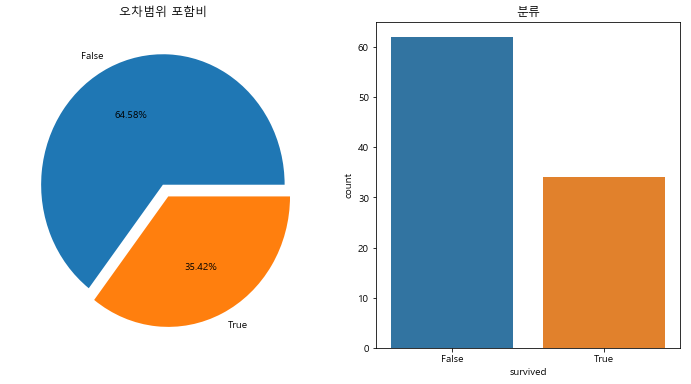

In [43]:
f,ax=plt.subplots(1, 2,figsize=(12,6))

total['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('오차범위 포함비')
ax[0].set_ylabel('')

sns.countplot('survived',data=total, ax=ax[1])
ax[1].set_title('분류')
plt.savefig('result_rate.png')
plt.show()

In [69]:
total.corr()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
번호,1.000000,-0.208141,NaN,-0.452264,-0.662034,0.497762,-0.791234,0.727276,0.727276
1회제공량 (g),-0.208141,1.000000,NaN,0.490515,0.128577,-0.508397,0.149749,-0.239113,-0.239113
열량 (kcal),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
탄수화물 (g),-0.452264,0.490515,NaN,1.000000,0.149091,-0.976793,0.517149,-0.549187,-0.549187
단백질 (g),-0.662034,0.128577,NaN,0.149091,1.000000,-0.321927,0.447571,-0.672653,-0.672653
지방 (g),0.497762,-0.508397,NaN,-0.976793,-0.321927,1.000000,-0.480606,0.633563,0.633563
Error,-0.791234,0.149749,NaN,0.517149,0.447571,-0.480606,1.000000,-0.568780,-0.568780
survived,0.727276,-0.239113,NaN,-0.549187,-0.672653,0.633563,-0.568780,1.000000,1.000000
b_servived,0.727276,-0.239113,NaN,-0.549187,-0.672653,0.633563,-0.568780,1.000000,1.000000


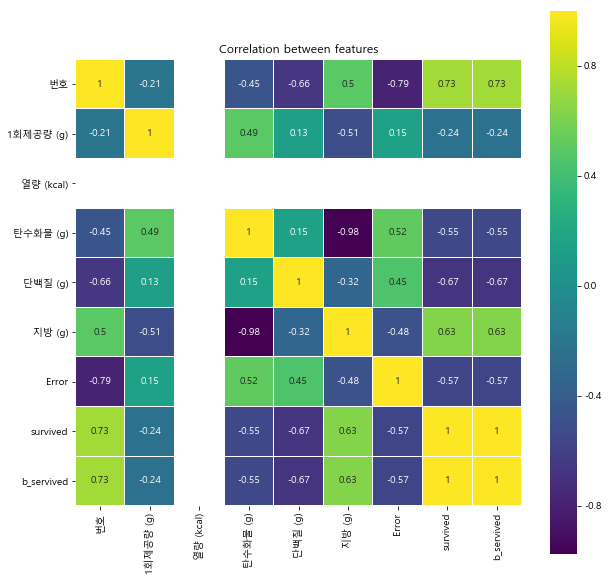

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(total.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.savefig('heatmap.png')
plt.show()

In [46]:
include = []
exclude = []
for i, d in enumerate(tmp_rate):
    if d:
        include.append(i)
    else:
        exclude.append(i)

In [47]:
fatt_include = total.loc[include]
fatt_exclude = total.loc[exclude]

In [48]:
fatt_include.to_excel('fatt_include.xlsx')
fatt_exclude.to_excel('fatt_exclude.xlsx')

In [49]:
fatt_include

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
1,805,견과류,"개암, 볶은것",6.578947,45,0.921053,0.921053,4.539474,3.223684,True,1
21,842,견과류,"마카다미아넛 가공(기타), 조미품",6.250000,45,0.762500,0.518750,4.793750,3.268750,True,1
31,860,견과류,"브라질너트, 마른것",6.828528,45,0.801669,0.977845,4.581942,3.355539,True,1
32,862,견과류,"브라질너트, 볶은것",6.726457,45,0.645740,1.002242,4.647982,3.423767,True,1
45,886,견과류,"잣, 볶은것",6.284916,45,0.295391,1.106145,4.713687,3.029330,True,1
52,899,견과류,"코코넛 가공(음료류), 코코넛밀크",19.565217,45,1.083913,0.448043,4.664348,3.106957,True,1
60,913,견과류,"피칸 가공(기타), 조미품",6.338028,45,0.858803,0.602113,4.707254,3.208944,True,1
61,915,견과류,"피칸, 마른것",6.512301,45,0.902605,0.597178,4.686903,3.181259,True,1
66,924,견과류,"호두, 마른것",6.493506,45,0.514286,1.004545,4.674675,3.147403,True,1
67,926,견과류,"호두, 볶은것",6.676558,45,0.701039,1.068249,4.566766,3.178042,True,1


In [55]:
fatt_include.shape

(34, 11)

In [50]:
fatt_exclude

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,803,견과류,"개암, 마른것",6.828528,45,0.887709,1.365706,4.028832,2.731411e-01,False,0
2,807,견과류,"도토리 가공(가루), 도토리가루",14.802632,45,12.434211,0.148026,0.148026,6.661184e+00,False,0
3,809,견과류,"도토리 가공(면류), 도토리묵",118.421053,45,12.078947,0.236842,0.236842,6.394737e+00,False,0
4,811,견과류,"도토리, 생것",21.951220,45,10.317073,0.878049,0.658537,5.707317e+00,False,0
5,813,견과류,"들깨, 마른것",8.555133,45,2.503232,1.940304,3.399810,3.372433e+00,False,0
6,814,견과류,"들깨, 생것",8.333333,45,3.125000,1.333333,3.291667,2.458333e+00,False,0
7,815,견과류,"들깨가루,들깨가루",8.333333,45,3.141667,1.333333,3.291667,2.525000e+00,False,0
8,817,견과류,"땅콩 가공(가루), 땅콩가루",8.007117,45,1.971352,2.276423,3.451868,3.057918e+00,False,0
9,819,견과류,"땅콩 가공(기타), 조미품",7.588533,45,2.086847,1.411467,3.824621,3.414840e+00,False,0
10,820,견과류,"땅콩 가공(기타), 커피맛",7.401316,45,1.998355,1.791118,3.315789,7.105427e-15,False,0


In [51]:
fatty  = fatt_include[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)']]
fatty.head()

,번호,탄수화물 (g),단백질 (g),지방 (g)
1,805,0.921053,0.921053,4.539474
21,842,0.762500,0.518750,4.793750
31,860,0.801669,0.977845,4.581942
32,862,0.645740,1.002242,4.647982
45,886,0.295391,1.106145,4.713687


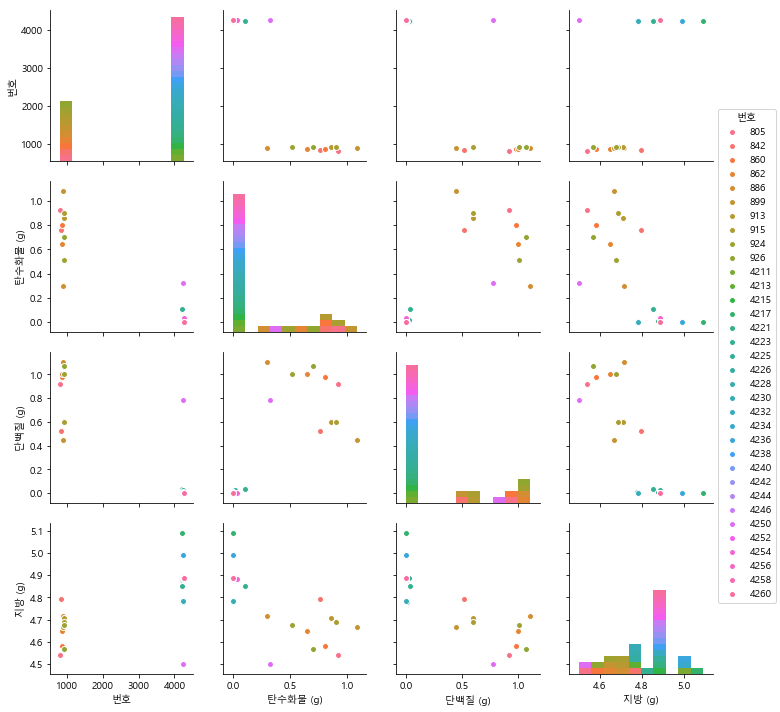

In [52]:
g = sns.pairplot(fatty, hue='번호',palette="husl")

In [54]:
fatt_include['식품군'].value_counts()

유지류    24
견과류    10
Name: 식품군, dtype: int64

In [56]:
fatt_exclude['식품군'].value_counts()

견과류    60
유지류     2
Name: 식품군, dtype: int64

In [62]:
fatty  = total[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)', 'b_servived']]
fatty.head()

,번호,탄수화물 (g),단백질 (g),지방 (g),b_servived
0,803,0.887709,1.365706,4.028832,0
1,805,0.921053,0.921053,4.539474,1
2,807,12.434211,0.148026,0.148026,0
3,809,12.078947,0.236842,0.236842,0
4,811,10.317073,0.878049,0.658537,0


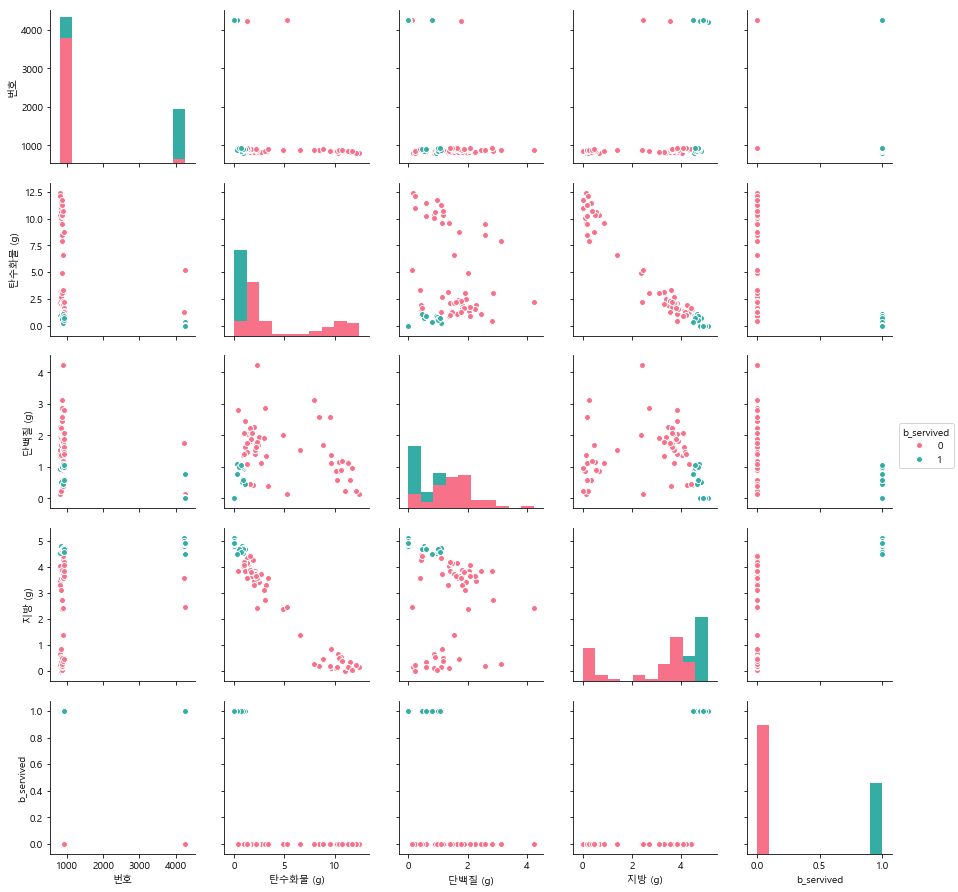

In [67]:
sns_plot = sns.pairplot(fatty, hue='b_servived',palette="husl")

In [68]:
sns_plot.savefig("fatt_output.png")